In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as st
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Tomsk-Almazov data.txt', sep='\t', header=0, index_col=0, encoding='cp1251')
targets = ['Госпитальная летальность (было/не было)', 'TND+Соматогенный психоз (было/не было)',
           'PND Пароксизмальная ночная одышка (было/не было)',
           'ЗПТ (Заместительная почечная терапия) (было/не было)', 'Кровотечение (было/не было)',
           'Инфаркт миокарда (было/не было)', 'Синдром полиорганной недостаточности (было/не было)']

df = df.drop('Дата операции', axis=1)
df = df.drop('Начало периода', axis=1)
df = df.drop('Конец периода', axis=1)
df = df.drop('Продленное ИВЛ (более 7 сут, было/не было)', axis=1)
df = df.drop('Объем кровопотери', axis=1)
df = df.drop('Окклюзия аорты', axis=1)
df = df.drop('Проксимальная фенестрация за ЛПА (0-нет, 1-да)', axis=1)
df = df.drop('сегмент А (размер)', axis=1)
df = df.drop('сегмент В (размер)', axis=1)
df = df.drop('сегмент С (размер)', axis=1)
df = df.drop('Стеноз ПНА (передняя нисходящая артерия) (0-нет, 1-<50%, 2->50%, 3->75%, 4-окклюзия)', axis=1)
df = df.drop('Атеросклероз аорты (0-нет, 1-да)', axis=1)
df = df.drop('Инфаркт миокарада в анамнезе (0-нет, 1 -да)', axis=1)
df = df.drop('Проксимальная фенестрация СТС (0-нет, 1-да)', axis=1)
df = df.drop('Проксимальная фенестрация ВоА (0-нет, 1-да)', axis=1)
df = df.drop('Проксимальная фенестрация Дуга (0-нет, 1-да)', axis=1)
df


,Госпитальная летальность (было/не было),TND+Соматогенный психоз (было/не было),PND Пароксизмальная ночная одышка (было/не было),ЗПТ (Заместительная почечная терапия) (было/не было),Кровотечение (было/не было),Инфаркт миокарда (было/не было),Синдром полиорганной недостаточности (было/не было),Возраст,Пол,рост,...,"Повторный доступ - рестернотомия (0-нет, 1-да)",Продолжительность операции,Эрмасса (дозы),СЗП (дозы),Тромбоциты (дозы),Гемоглобин2,Гематокрит2,Креатинин2,АКШ,ПАК
Пациент,,,,,,,,,,,,,,,,,,,,,
GACAAGc,0,0,0,0,0,1.0,0,83.0,NaN,176.0,...,0.0,200.0,0,0,0,85.0,NaN,NaN,1,0
GACAAbN,0,0,0,0,0,1.0,0,67.0,1.0,169.0,...,1.0,425.0,0,0,0,NaN,NaN,NaN,1,1
GACACET,0,1,0,0,0,0.0,0,28.0,0.0,175.0,...,0.0,300.0,0,0,0,NaN,36.0,70.0,1,0
GACACuN,0,0,0,0,0,0.0,0,83.0,NaN,161.0,...,0.0,225.0,2,0,0,92.0,37.0,167.0,0,1
GACADLz,0,0,0,0,0,0.0,0,64.0,1.0,188.0,...,1.0,265.0,0,0,0,NaN,32.0,68.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93,0,0,0,0,0,0.0,1,59.0,1.0,165.0,...,0.0,570.0,4,3,3,113.0,17.0,124.0,1,0
94,0,0,0,0,0,0.0,0,59.0,0.0,158.0,...,0.0,440.0,4,2,2,86.0,24.0,107.0,0,0
95,0,0,0,0,0,0.0,0,55.0,1.0,173.0,...,0.0,390.0,1,4,2,103.0,29.0,103.0,0,0


In [3]:
#Удалим строки, в которых более 30% пропусков. Исходный датасет сократился на 528 строк.
row_nan_per = df.isnull().sum(axis=1) / df.shape[1]
df.drop(row_nan_per[row_nan_per >= 0.1].index, axis=0, inplace=True)
df.shape

(308, 58)

In [9]:
nuls = df.isnull().mean().to_frame().sort_values(by=0, ascending = False)
nuls = nuls.reset_index()
nuls.columns = ['feature','%_nulls']
nuls['%_fulls'] = nuls['%_nulls'].apply(lambda x: 1 - x)
nuls.head(20)

,feature,%_nulls,%_fulls
0,СКФ,0.597403,0.402597
1,Гемоглобин2,0.383117,0.616883
2,Гемоглобин,0.383117,0.616883
3,Пол,0.282468,0.717532
4,Время ИК,0.246753,0.753247
5,дуга (размер),0.191558,0.808442
6,синусы Вальсальвы,0.162338,0.837662
7,ВоА (размер),0.068182,0.931818
8,Мочевина,0.025974,0.974026
9,Возраст,0.019481,0.980519


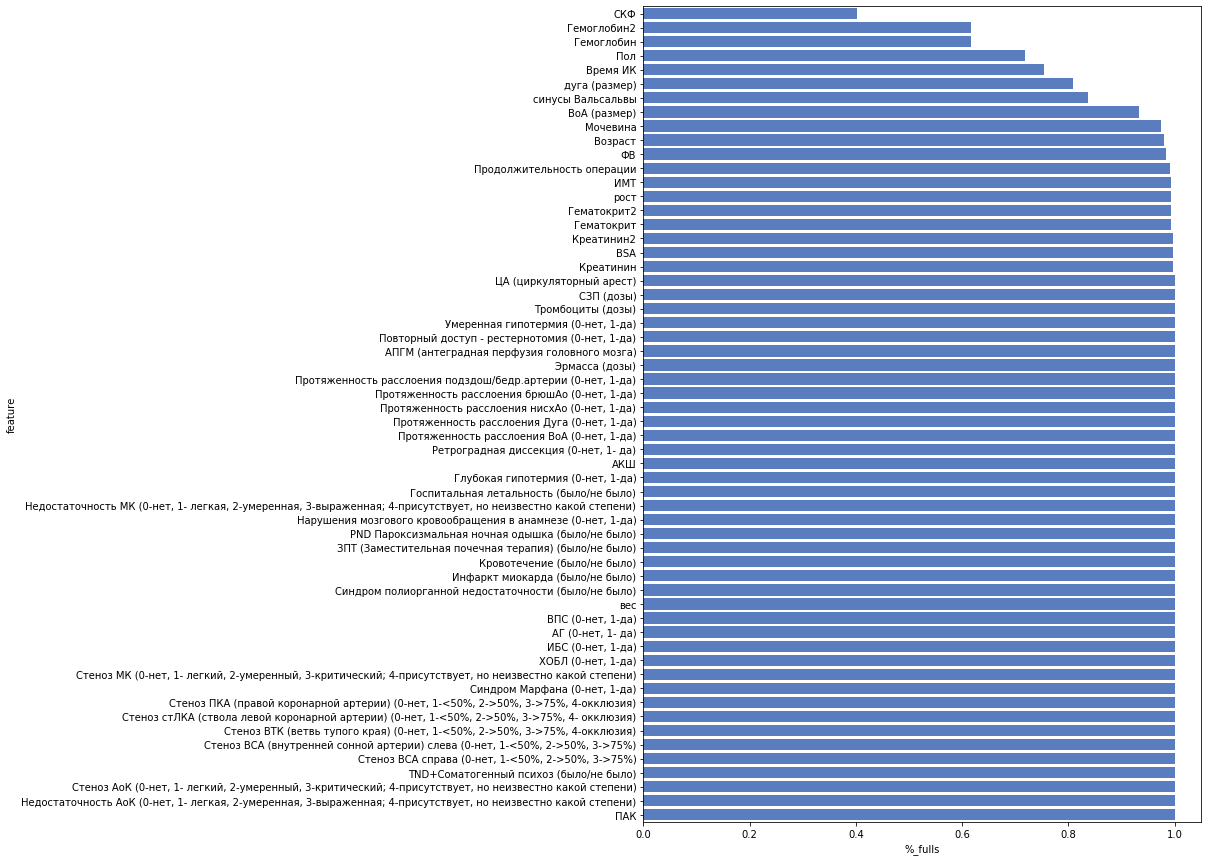

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

f, ax = plt.subplots(figsize=(10, 15))

sns.set_color_codes("muted")
sns.barplot(x="%_fulls", y='feature', data=nuls,
            label="Заполненные значения", color="b")



In [11]:
null_cols = list(nuls.loc[nuls['%_nulls']>0.3].feature)
#future_cols = [col for col in df.columns if col in targets]

#df_targets = df[targets]

cols2drop = null_cols+future_cols
df.drop(cols2drop, axis=1, inplace=True)
df.shape

NameError: name 'future_cols' is not defined

In [12]:
nuls = df.isnull().mean().to_frame().sort_values(by=0, ascending = False)
nuls = nuls.reset_index()
nuls.columns = ['feature','%_nulls']
nuls['%_fulls'] = nuls['%_nulls'].apply(lambda x: 1 - x)
nuls.head(20)

,feature,%_nulls,%_fulls
0,СКФ,0.597403,0.402597
1,Гемоглобин2,0.383117,0.616883
2,Гемоглобин,0.383117,0.616883
3,Пол,0.282468,0.717532
4,Время ИК,0.246753,0.753247
5,дуга (размер),0.191558,0.808442
6,синусы Вальсальвы,0.162338,0.837662
7,ВоА (размер),0.068182,0.931818
8,Мочевина,0.025974,0.974026
9,Возраст,0.019481,0.980519


In [13]:
for col in df.columns:
    if (df[col].nunique() <= 5) & (df[col].dtype != object):
        df[col] = df[col].astype('category') 
        
NUMERICAL = df.select_dtypes(exclude=['category']).columns.tolist()
ORDINAL = df.select_dtypes(include=['category']).columns.tolist()
for tar in targets:
    if tar in NUMERICAL:
        NUMERICAL.remove(tar)
for tar in targets:
    if tar in ORDINAL:
        ORDINAL.remove(tar)

In [53]:
NUMERICAL

['Возраст',
 'рост',
 'вес',
 'ИМТ',
 'BSA',
 'Креатинин',
 'ФВ',
 'ВоА (размер)',
 'АПГМ (антеградная перфузия головного мозга)',
 'ЦА (циркуляторный арест)',
 'Продолжительность операции',
 'Эрмасса (дозы)',
 'СЗП (дозы)',
 'Тромбоциты (дозы)',
 'Креатинин2']

In [54]:
ORDINAL

['ВПС (0-нет, 1-да)',
 'АГ (0-нет, 1- да)',
 'ИБС (0-нет, 1-да)',
 'Инфаркт миокарада в анамнезе (0-нет, 1 -да)',
 'Нарушения мозгового кровообращения в анамнезе (0-нет, 1-да)',
 'ХОБЛ (0-нет, 1-да)',
 'Синдром Марфана (0-нет, 1-да)',
 'Стеноз ПКА (правой коронарной артерии) (0-нет, 1-<50%, 2->50%, 3->75%, 4-окклюзия)',
 'Стеноз стЛКА (ствола левой коронарной артерии) (0-нет, 1-<50%, 2->50%, 3->75%, 4- окклюзия)',
 'Стеноз ВТК (ветвь тупого края) (0-нет, 1-<50%, 2->50%, 3->75%, 4-окклюзия)',
 'Стеноз ВСА (внутренней сонной артерии) слева (0-нет, 1-<50%, 2->50%, 3->75%)',
 'Стеноз ВСА справа (0-нет, 1-<50%, 2->50%, 3->75%)',
 'Стеноз АоК (0-нет, 1- легкий, 2-умеренный, 3-критический; 4-присутствует, но неизвестно какой степени)',
 'Недостаточность АоК (0-нет, 1- легкая, 2-умеренная, 3-выраженная; 4-присутствует, но неизвестно какой степени)',
 'Стеноз МК (0-нет, 1- легкий, 2-умеренный, 3-критический; 4-присутствует, но неизвестно какой степени)',
 'Недостаточность МК (0-нет, 1- легкая, 

In [55]:
pd.set_option('display.max_columns', None)
df[NUMERICAL].describe()

,Возраст,рост,вес,ИМТ,BSA,Креатинин,ФВ,ВоА (размер),АПГМ (антеградная перфузия головного мозга),ЦА (циркуляторный арест),Продолжительность операции,Эрмасса (дозы),СЗП (дозы),Тромбоциты (дозы),Креатинин2
count,598.000000,601.000000,612.000000,600.000000,602.000000,453.000000,594.000000,495.000000,627.000000,627.000000,611.000000,627.000000,627.000000,627.000000,453.000000
mean,58.954849,173.344426,82.565359,27.414500,1.958937,119.090949,59.765993,48.145455,9.446571,9.489633,282.371522,1.208931,1.872408,1.108453,125.668433
std,12.256184,9.326102,17.097697,5.128724,0.249670,77.801416,10.402075,12.487364,23.192725,19.283602,167.726635,2.178764,3.059002,2.023277,78.822728
min,15.000000,147.000000,50.000000,15.200000,0.110000,19.000000,14.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,19.000000
25%,52.000000,168.000000,70.000000,24.100000,1.800000,80.000000,55.000000,38.000000,0.000000,0.000000,200.000000,0.000000,0.000000,0.000000,88.000000
50%,61.000000,174.000000,80.000000,27.000000,1.950000,102.000000,61.000000,48.000000,0.000000,0.000000,260.000000,0.000000,0.000000,0.000000,109.000000
75%,67.000000,180.000000,92.250000,30.100000,2.100000,128.000000,67.000000,56.000000,1.000000,13.500000,354.000000,2.000000,4.000000,2.000000,135.000000
max,83.000000,201.000000,170.000000,58.800000,2.880000,877.000000,82.000000,105.000000,155.000000,115.000000,1950.000000,13.000000,22.000000,12.000000,877.000000


In [56]:
def find_ordinal_with_dominant(df, size=50, with_dominant_value=False, max_percent=0.9):
    # if a number of unique varibles is less than or equal to n, this variable is considered as categorial
    names = df.columns
    ordinal_vars = []
    for n in names:
        if df[n].nunique() <= size:
            if with_dominant_value:
                nums = df[n].value_counts().values
                if (len(nums) > 0) and (nums[0] / np.sum(nums) > max_percent ):
                    ordinal_vars.append(n) 
            else:
                ordinal_vars.append(n)
                
    return ordinal_vars

In [57]:
dominant_ords = find_ordinal_with_dominant(df, with_dominant_value=True, max_percent=0.98)
dominant_ords

['Стеноз ВТК (ветвь тупого края) (0-нет, 1-<50%, 2->50%, 3->75%, 4-окклюзия)',
 'Стеноз МК (0-нет, 1- легкий, 2-умеренный, 3-критический; 4-присутствует, но неизвестно какой степени)',
 'Проксимальная фенестрация Дуга (0-нет, 1-да)']

c:\users\софья\appdata\local\programs\python\python37\lib\site-packages\pandas\io\formats\format.py:1405: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  for val, m in zip(values.ravel(), mask.ravel())
c:\users\софья\appdata\local\programs\python\python37\lib\site-packages\pandas\io\formats\format.py:1405: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  for val, m in zip(values.ravel(), mask.ravel())
c:\users\софья\appdata\local\programs\python\python37\lib\site-packages\pandas\io\formats\format.py:1405: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  for val, m in zip(values.ravel(), mask.ravel())
c:\users\софья\appdata\local\programs\python\python37\lib\site-packages\pandas\io\formats\format.py:1405: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this wi

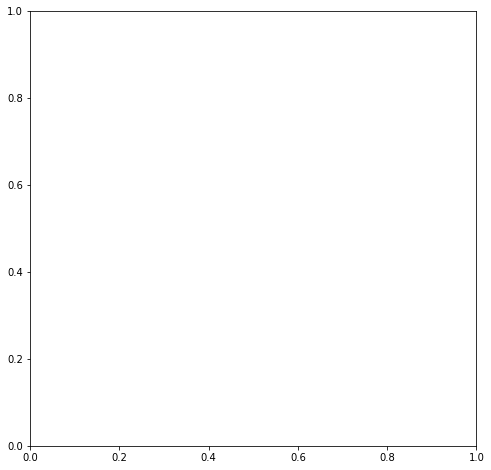

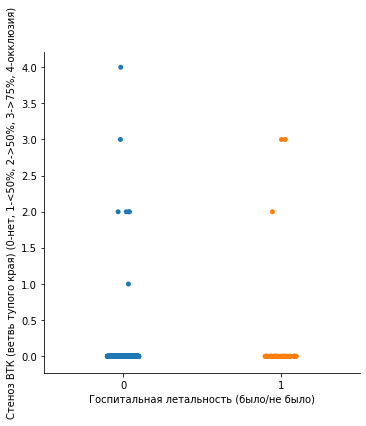

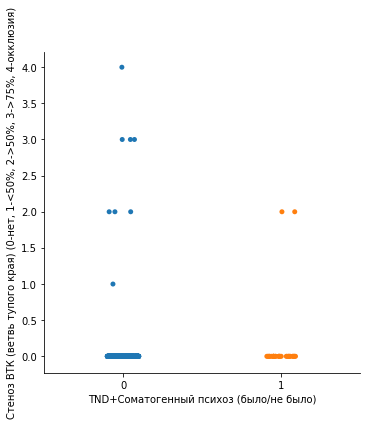

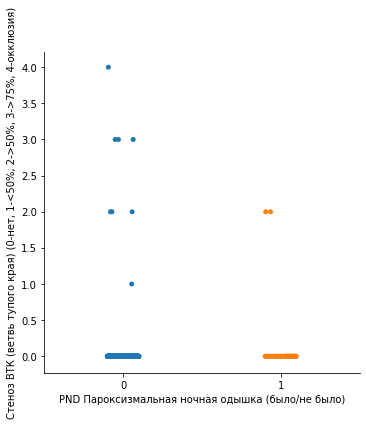

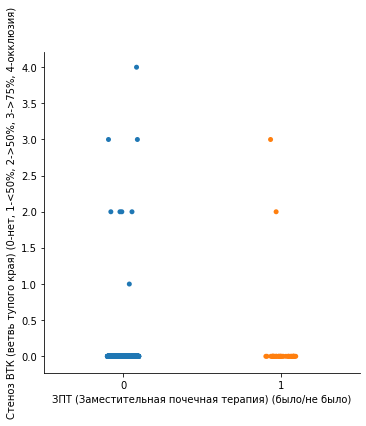

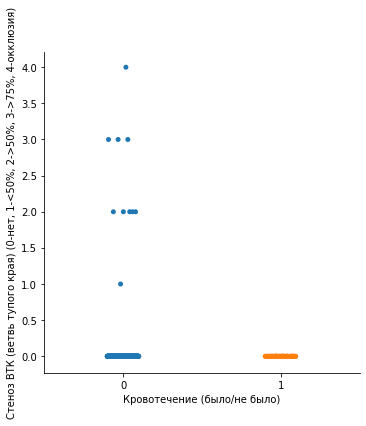

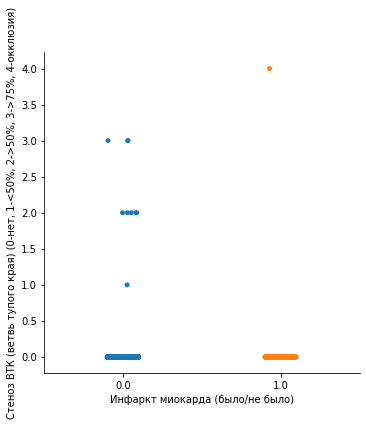

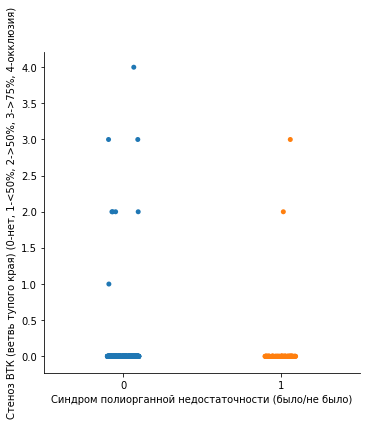

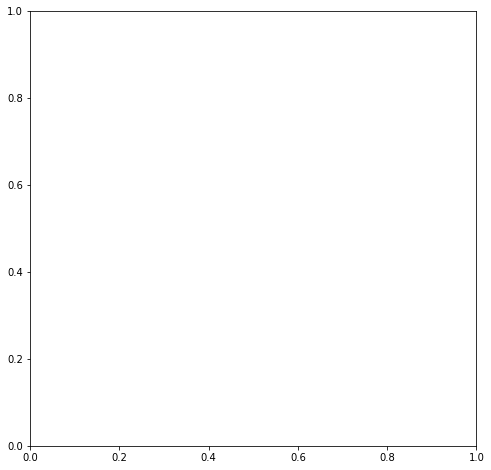

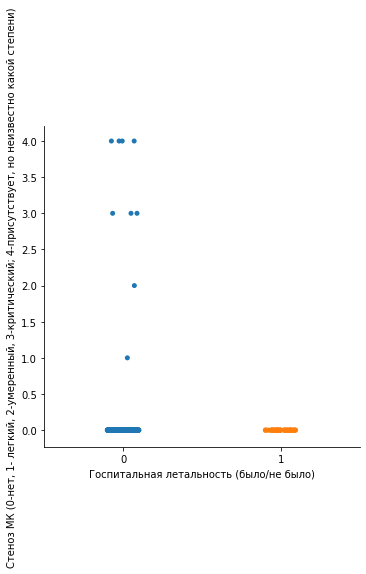

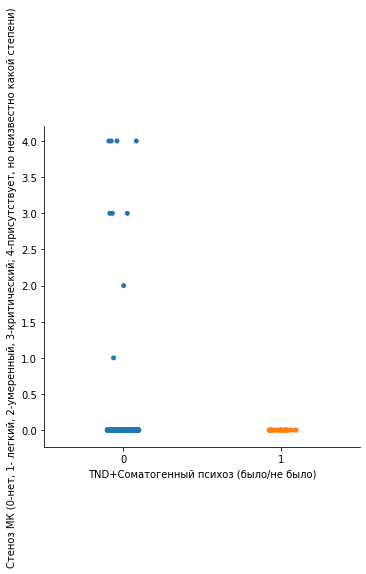

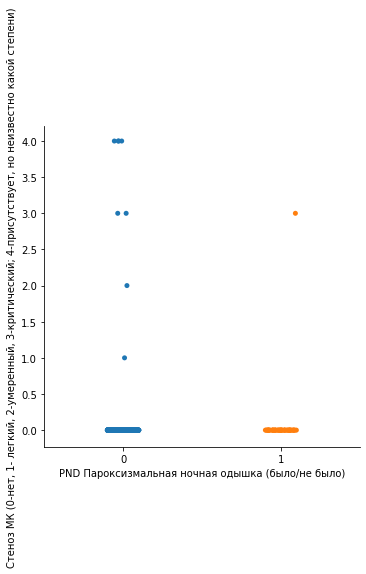

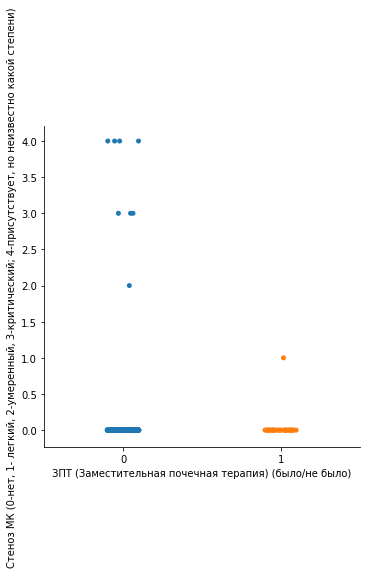

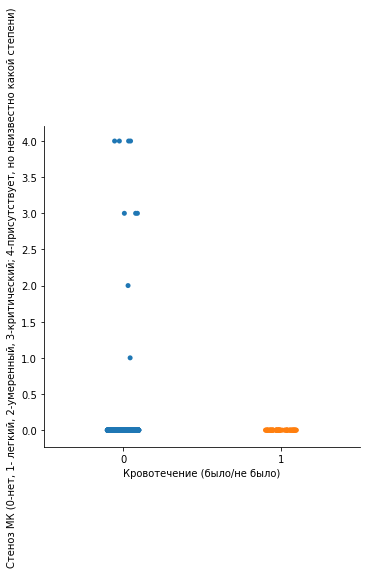

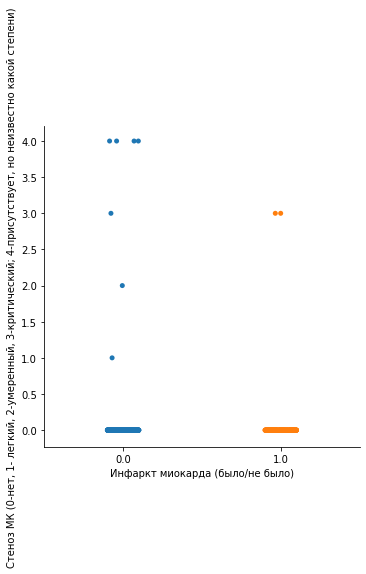

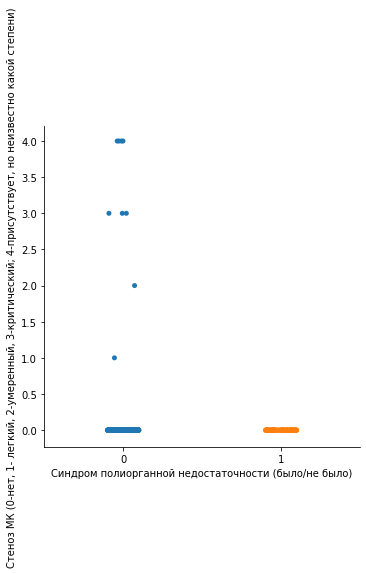

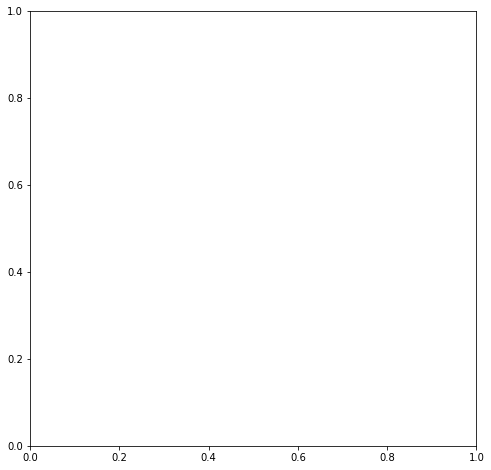

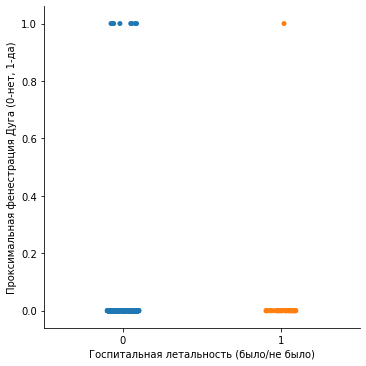

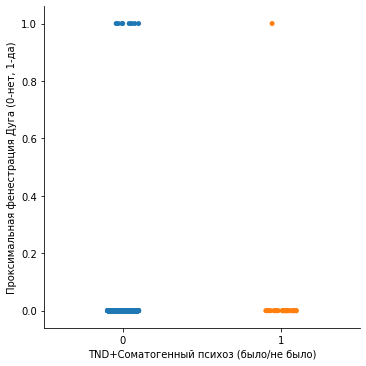

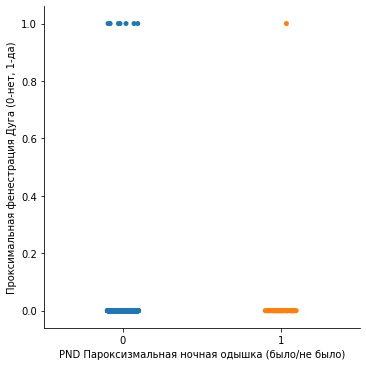

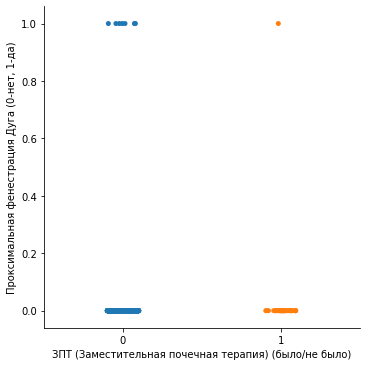

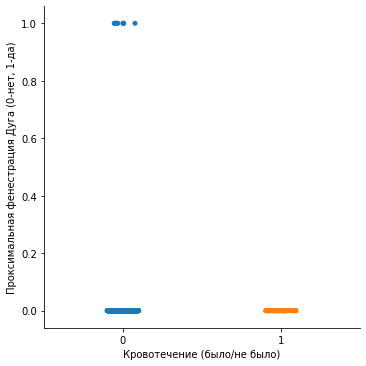

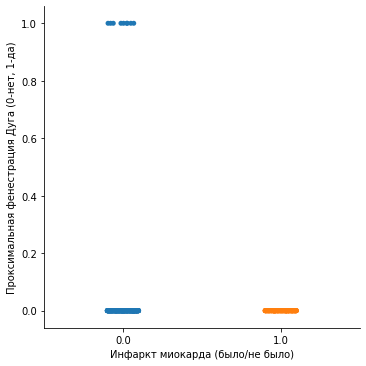

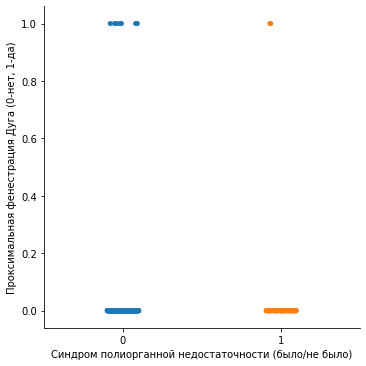

In [67]:
for i in range(len(dominant_ords)):
    f, ax = plt.subplots(figsize=(8,8))
    for j in range(len(targets)):
        sns.catplot(x=targets[j], y=dominant_ords[i], data=df)
        #sns.pairplot(df[[dominant_ords[i]]+targets].astype(float), x_vars=targets, y_vars=dominant_ords[i])

In [ ]:
#df.drop(dominant_ords[1:-1], axis=1, inplace=True)

In [68]:
pd.set_option('display.max_columns', None)
df[NUMERICAL].describe()

,Возраст,рост,вес,ИМТ,BSA,Креатинин,ФВ,ВоА (размер),АПГМ (антеградная перфузия головного мозга),ЦА (циркуляторный арест),Продолжительность операции,Эрмасса (дозы),СЗП (дозы),Тромбоциты (дозы),Креатинин2
count,598.000000,601.000000,612.000000,600.000000,602.000000,453.000000,594.000000,495.000000,627.000000,627.000000,611.000000,627.000000,627.000000,627.000000,453.000000
mean,58.954849,173.344426,82.565359,27.414500,1.958937,119.090949,59.765993,48.145455,9.446571,9.489633,282.371522,1.208931,1.872408,1.108453,125.668433
std,12.256184,9.326102,17.097697,5.128724,0.249670,77.801416,10.402075,12.487364,23.192725,19.283602,167.726635,2.178764,3.059002,2.023277,78.822728
min,15.000000,147.000000,50.000000,15.200000,0.110000,19.000000,14.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,19.000000
25%,52.000000,168.000000,70.000000,24.100000,1.800000,80.000000,55.000000,38.000000,0.000000,0.000000,200.000000,0.000000,0.000000,0.000000,88.000000
50%,61.000000,174.000000,80.000000,27.000000,1.950000,102.000000,61.000000,48.000000,0.000000,0.000000,260.000000,0.000000,0.000000,0.000000,109.000000
75%,67.000000,180.000000,92.250000,30.100000,2.100000,128.000000,67.000000,56.000000,1.000000,13.500000,354.000000,2.000000,4.000000,2.000000,135.000000
max,83.000000,201.000000,170.000000,58.800000,2.880000,877.000000,82.000000,105.000000,155.000000,115.000000,1950.000000,13.000000,22.000000,12.000000,877.000000


In [69]:
pd.reset_option('max_columns')

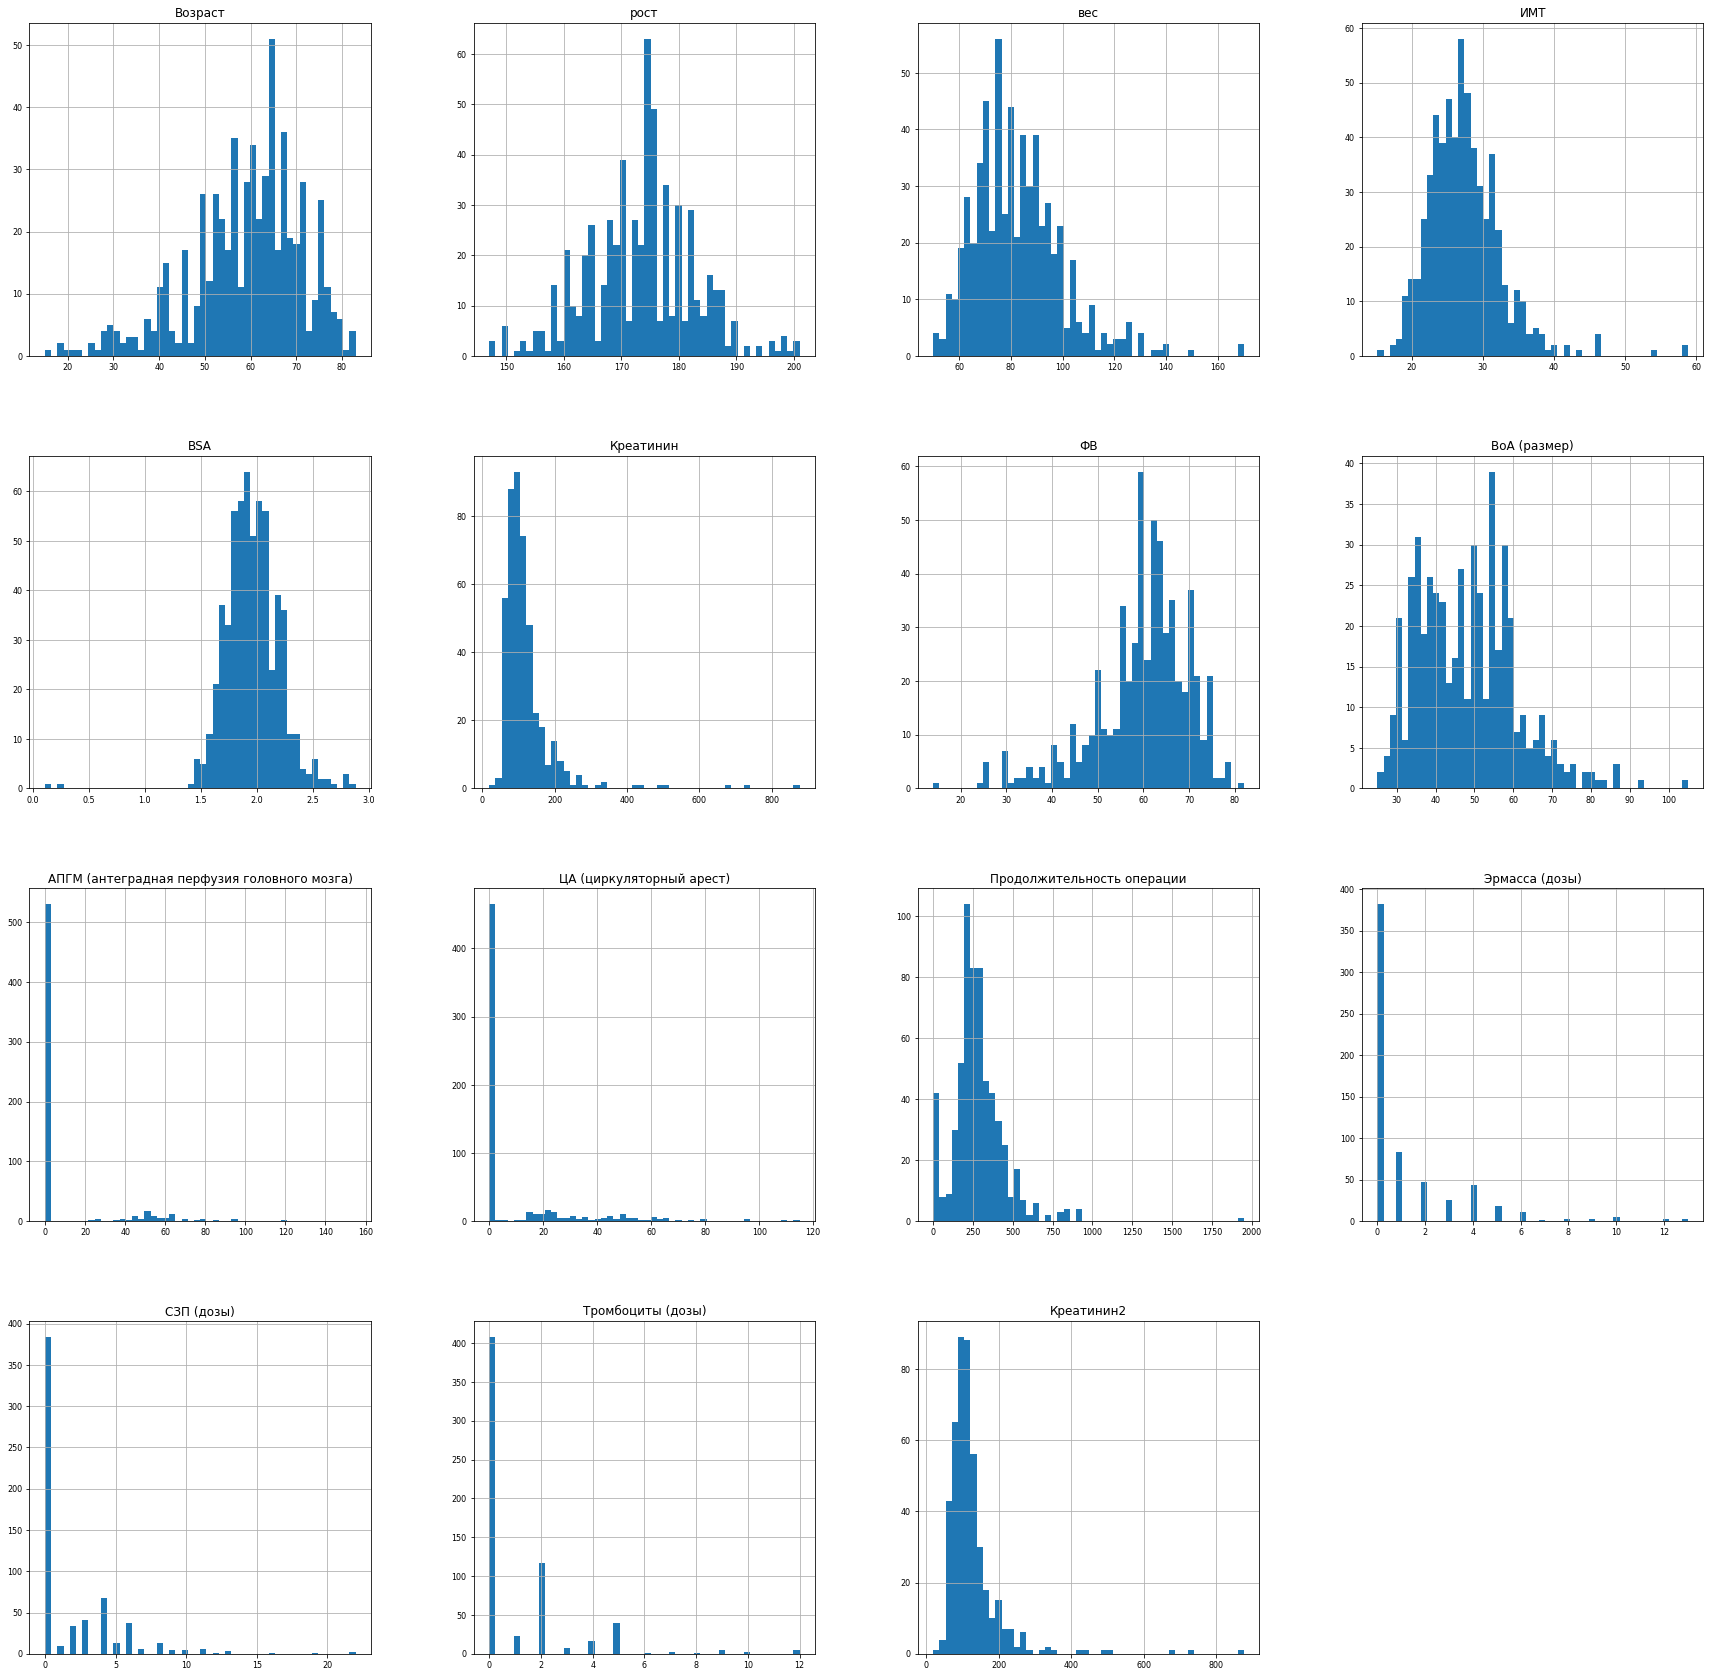

In [70]:
import warnings
warnings.filterwarnings('ignore')

df[NUMERICAL].hist(figsize=(30, 30), bins=50, xlabelsize=8, ylabelsize=8);

In [71]:
def std_boxplot(dataframe, features=[], *args, **kwargs):
    x = dataframe[features].copy()
    # standardize features
    for col in x.columns:
        x[col] = (x[col] - x[col].mean()) / x[col].std()
    # draw boxplot
    fig,ax=plt.subplots(*args, **kwargs)
    sns.boxplot(data=x, ax=ax, orient='h')
    ax.set_xticks(np.arange(0,int(max(x.max(axis=1,skipna=True))),5))
    plt.xticks(fontsize='8')
    plt.grid()
    plt.show();
    return x

In [73]:
#plot = std_boxplot(df, NUMERICAL, figsize=(20,30))

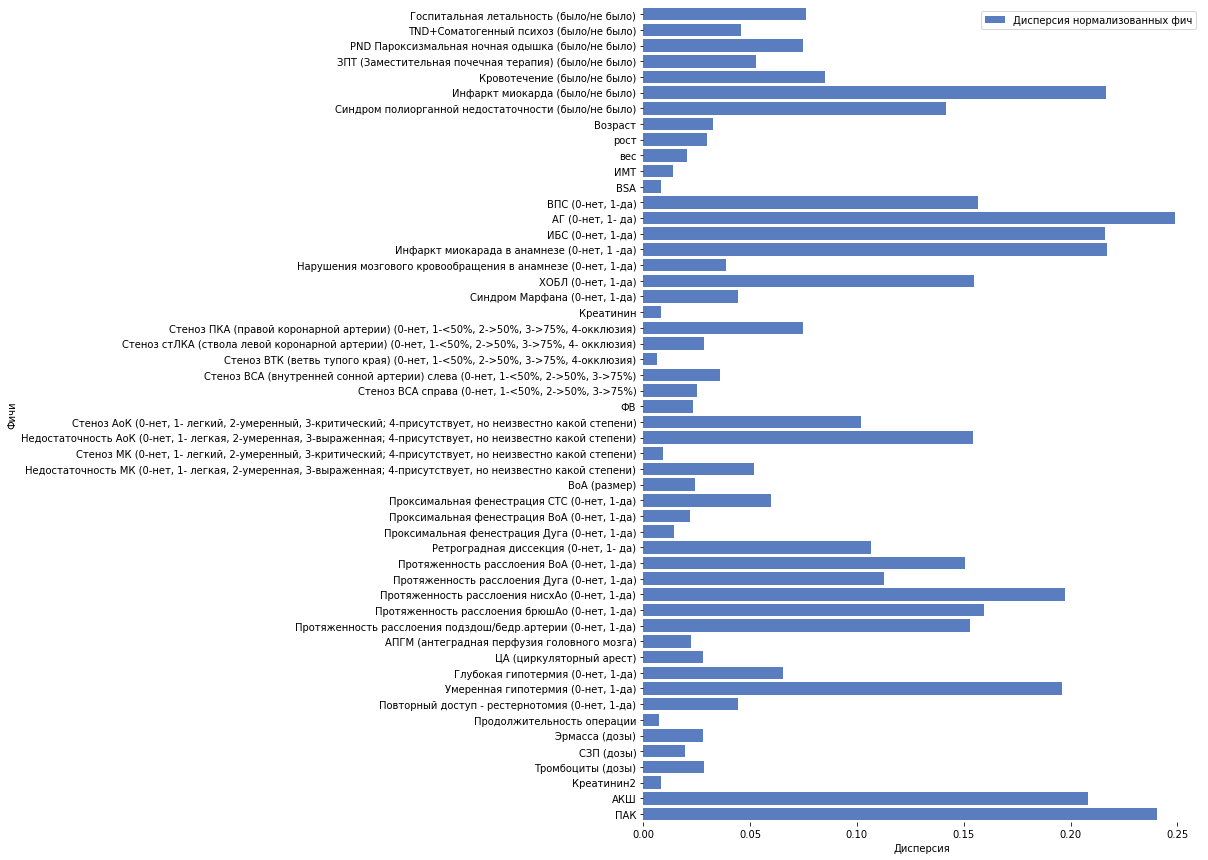

In [74]:
import statistics
from statistics import pvariance

def normalize_list(lst):
    maxx = max(lst)
    minn = min(lst)
    norm = [(x - minn) / (maxx - minn) for x in lst]
    return norm

variances = []
for item in df.columns:
    col = df[item]
    c = [item for item in col if item==item]
    c = normalize_list(c)
    variance = pvariance(c)
    variances.append(variance)
    
f, ax = plt.subplots(figsize=(10, 15))

sns.set_color_codes("muted")
sns.barplot(x=variances, y=df.columns, label="Дисперсия нормализованных фич", color="b")

ax.legend(ncol=2, loc="upper right", frameon=True)
ax.set(ylabel="Фичи",
       xlabel="Дисперсия")
sns.despine(left=True, bottom=True)

In [75]:
new_cols2drop = [(v, df.columns[i]) for i,v in enumerate(variances) if v<0.005]
new_cols2drop

[]

In [76]:
df.to_csv('томск-алмазов чистый.txt', sep='\t')

# Моделирование

In [47]:
df = pd.read_csv('Tomsk-Almazov data.txt', sep='\t', index_col=0, encoding='cp1251')#томск-алмазов чистый

targets = ['Госпитальная летальность (было/не было)', 'TND+Соматогенный психоз (было/не было)',
           'PND Пароксизмальная ночная одышка (было/не было)',
           'ЗПТ (Заместительная почечная терапия) (было/не было)', 'Кровотечение (было/не было)',
           'Инфаркт миокарда (было/не было)', 'Синдром полиорганной недостаточности (было/не было)']

df = df.drop('Дата операции', axis=1)
df = df.drop('Начало периода', axis=1)
df = df.drop('Конец периода', axis=1)
df = df.drop('Продленное ИВЛ (более 7 сут, было/не было)', axis=1)
df = df.drop('Объем кровопотери', axis=1)
df = df.drop('Окклюзия аорты', axis=1)
df = df.drop('Проксимальная фенестрация за ЛПА (0-нет, 1-да)', axis=1)
df = df.drop('сегмент А (размер)', axis=1)
df = df.drop('сегмент В (размер)', axis=1)
df = df.drop('сегмент С (размер)', axis=1)
df = df.drop('Стеноз ПНА (передняя нисходящая артерия) (0-нет, 1-<50%, 2->50%, 3->75%, 4-окклюзия)', axis=1)
df = df.drop('Атеросклероз аорты (0-нет, 1-да)', axis=1)
df = df.drop('Инфаркт миокарада в анамнезе (0-нет, 1 -да)', axis=1)

df.head()

,Госпитальная летальность (было/не было),TND+Соматогенный психоз (было/не было),PND Пароксизмальная ночная одышка (было/не было),ЗПТ (Заместительная почечная терапия) (было/не было),Кровотечение (было/не было),Инфаркт миокарда (было/не было),Синдром полиорганной недостаточности (было/не было),Возраст,Пол,рост,...,"Повторный доступ - рестернотомия (0-нет, 1-да)",Продолжительность операции,Эрмасса (дозы),СЗП (дозы),Тромбоциты (дозы),Гемоглобин2,Гематокрит2,Креатинин2,АКШ,ПАК
Пациент,,,,,,,,,,,,,,,,,,,,,
GACAAGc,0,0,0,0,0,1.0,0,83.0,NaN,176.0,...,0.0,200.0,0,0,0,85.0,NaN,NaN,1,0
GACAAbN,0,0,0,0,0,1.0,0,67.0,1.0,169.0,...,1.0,425.0,0,0,0,NaN,NaN,NaN,1,1
GACACET,0,1,0,0,0,0.0,0,28.0,0.0,175.0,...,0.0,300.0,0,0,0,NaN,36.0,70.0,1,0
GACACuN,0,0,0,0,0,0.0,0,83.0,NaN,161.0,...,0.0,225.0,2,0,0,92.0,37.0,167.0,0,1
GACADLz,0,0,0,0,0,0.0,0,64.0,1.0,188.0,...,1.0,265.0,0,0,0,NaN,32.0,68.0,0,1


In [4]:
from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer

def simple_impute(df, col, strategy):
    imputer = SimpleImputer(missing_values=np.nan, strategy=strategy)
    imp_col = imputer.fit_transform(df[col].to_numpy().reshape(-1, 1))
    new_col = col+'_'+strategy
    df[new_col] = imp_col
    return df, new_col

def knn_impute(df, col):
    imputer = KNNImputer(n_neighbors=2)
    imp_col = imputer.fit_transform(df[col].to_numpy().reshape(-1, 1))
    imp_col = [item[0] for item in imp_col.tolist()]
    new_col = col+'_knn'
    df[new_col] = imp_col
    return df, new_col

cols = set(df.columns) - set(targets)
nan_cols=[col for col in cols if df[col].isnull().values.any()]

#Стратегия mean
df_imp = df[nan_cols]
mean_cols=[]
for col in nan_cols:
    df_imp, new_col = simple_impute(df_imp, col, 'mean')
    mean_cols.append(new_col)

#Стратегия median 
median_cols=[]
for col in nan_cols:
    df_imp, new_col = simple_impute(df_imp, col, 'median')
    median_cols.append(new_col)
    
#Стратегия freq 
freq_cols = []
for col in nan_cols:
    df_imp, new_col = simple_impute(df_imp, col, 'most_frequent')
    freq_cols.append(new_col)
    
#Стратегия knn 
knn_cols = []
for col in nan_cols:
    df_imp, new_col = knn_impute(df_imp, col)
    knn_cols.append(new_col)

c:\users\софья\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
c:\users\софья\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
c:\users\софья\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_inde

c:\users\софья\appdata\local\programs\python\python37\lib\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
c:\users\софья\appdata\local\programs\python\python37\lib\site-packages\matplotlib\axes\_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
c:\users\софья\appdata\local\programs\python\python37\lib\site-packages\matplotlib\axes\_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


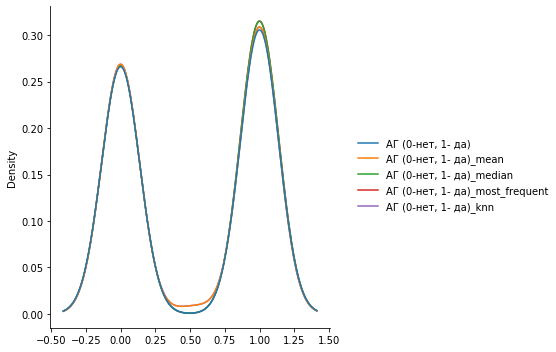

c:\users\софья\appdata\local\programs\python\python37\lib\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
c:\users\софья\appdata\local\programs\python\python37\lib\site-packages\matplotlib\axes\_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
c:\users\софья\appdata\local\programs\python\python37\lib\site-packages\matplotlib\axes\_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


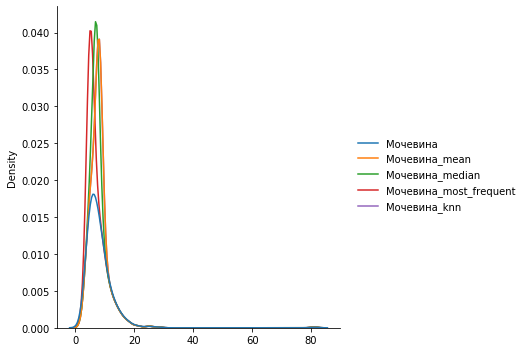

c:\users\софья\appdata\local\programs\python\python37\lib\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
c:\users\софья\appdata\local\programs\python\python37\lib\site-packages\matplotlib\axes\_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
c:\users\софья\appdata\local\programs\python\python37\lib\site-packages\matplotlib\axes\_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


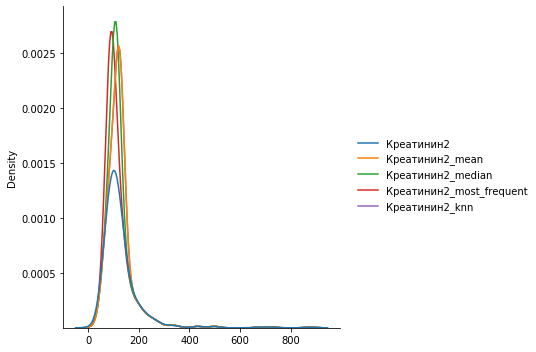

c:\users\софья\appdata\local\programs\python\python37\lib\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
c:\users\софья\appdata\local\programs\python\python37\lib\site-packages\matplotlib\axes\_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
c:\users\софья\appdata\local\programs\python\python37\lib\site-packages\matplotlib\axes\_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


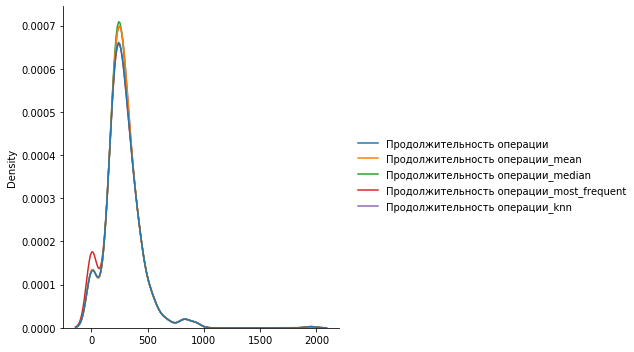

c:\users\софья\appdata\local\programs\python\python37\lib\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
c:\users\софья\appdata\local\programs\python\python37\lib\site-packages\matplotlib\axes\_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
c:\users\софья\appdata\local\programs\python\python37\lib\site-packages\matplotlib\axes\_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


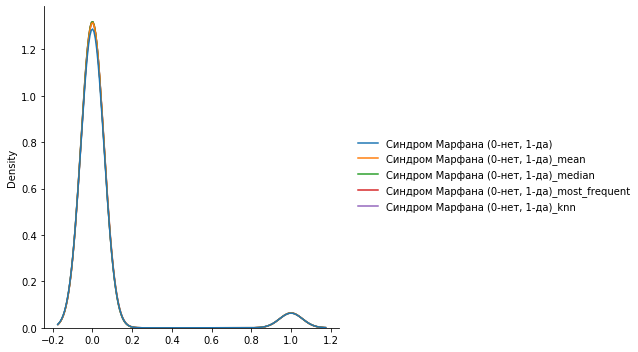

c:\users\софья\appdata\local\programs\python\python37\lib\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
c:\users\софья\appdata\local\programs\python\python37\lib\site-packages\matplotlib\axes\_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
c:\users\софья\appdata\local\programs\python\python37\lib\site-packages\matplotlib\axes\_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


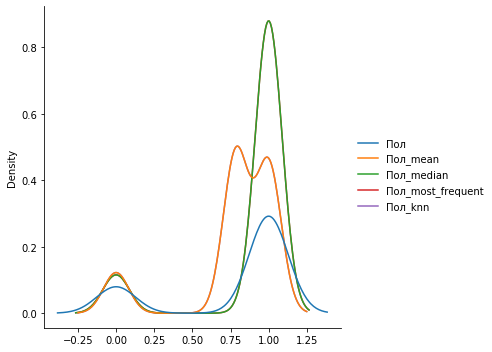

c:\users\софья\appdata\local\programs\python\python37\lib\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
c:\users\софья\appdata\local\programs\python\python37\lib\site-packages\matplotlib\axes\_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
c:\users\софья\appdata\local\programs\python\python37\lib\site-packages\matplotlib\axes\_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


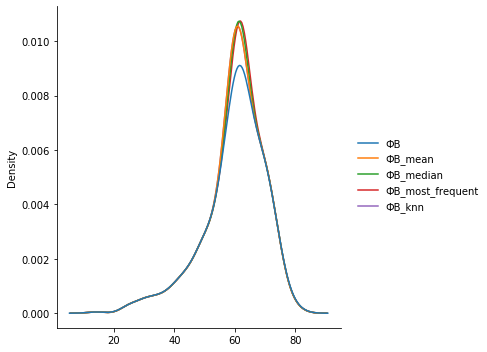

c:\users\софья\appdata\local\programs\python\python37\lib\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
c:\users\софья\appdata\local\programs\python\python37\lib\site-packages\matplotlib\axes\_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
c:\users\софья\appdata\local\programs\python\python37\lib\site-packages\matplotlib\axes\_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


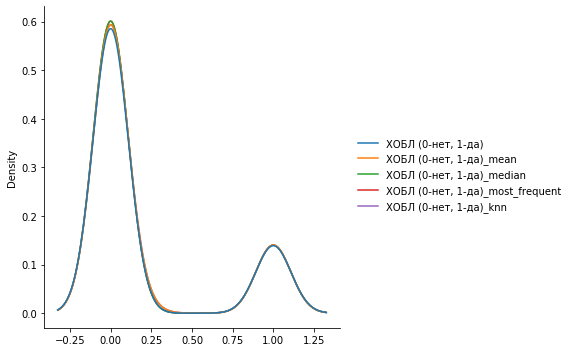

c:\users\софья\appdata\local\programs\python\python37\lib\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
c:\users\софья\appdata\local\programs\python\python37\lib\site-packages\matplotlib\axes\_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
c:\users\софья\appdata\local\programs\python\python37\lib\site-packages\matplotlib\axes\_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


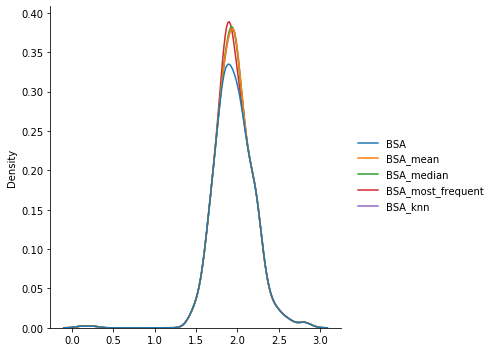

c:\users\софья\appdata\local\programs\python\python37\lib\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
c:\users\софья\appdata\local\programs\python\python37\lib\site-packages\matplotlib\axes\_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
c:\users\софья\appdata\local\programs\python\python37\lib\site-packages\matplotlib\axes\_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


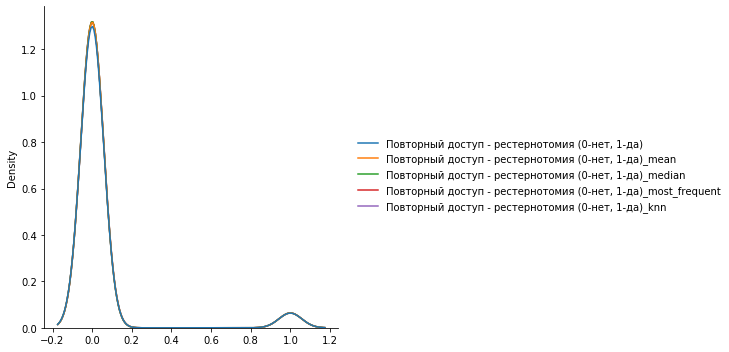

c:\users\софья\appdata\local\programs\python\python37\lib\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
c:\users\софья\appdata\local\programs\python\python37\lib\site-packages\matplotlib\axes\_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
c:\users\софья\appdata\local\programs\python\python37\lib\site-packages\matplotlib\axes\_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


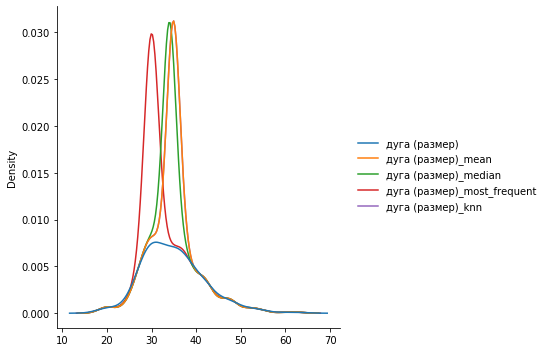

c:\users\софья\appdata\local\programs\python\python37\lib\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
c:\users\софья\appdata\local\programs\python\python37\lib\site-packages\matplotlib\axes\_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
c:\users\софья\appdata\local\programs\python\python37\lib\site-packages\matplotlib\axes\_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


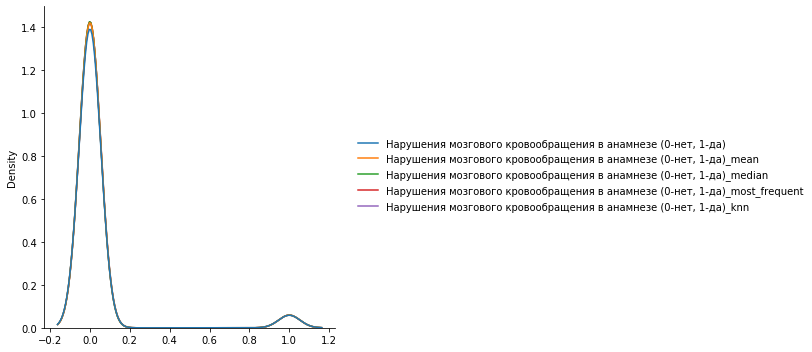

c:\users\софья\appdata\local\programs\python\python37\lib\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
c:\users\софья\appdata\local\programs\python\python37\lib\site-packages\matplotlib\axes\_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
c:\users\софья\appdata\local\programs\python\python37\lib\site-packages\matplotlib\axes\_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


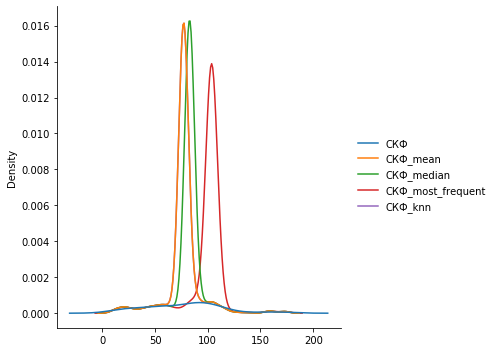

c:\users\софья\appdata\local\programs\python\python37\lib\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
c:\users\софья\appdata\local\programs\python\python37\lib\site-packages\matplotlib\axes\_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
c:\users\софья\appdata\local\programs\python\python37\lib\site-packages\matplotlib\axes\_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


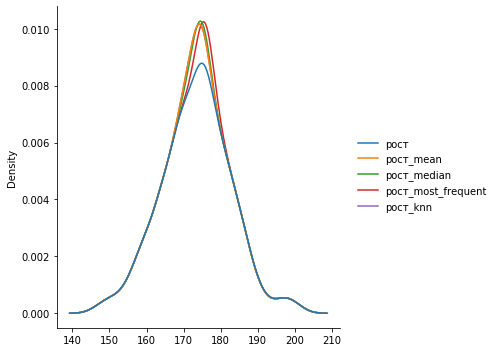

c:\users\софья\appdata\local\programs\python\python37\lib\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
c:\users\софья\appdata\local\programs\python\python37\lib\site-packages\matplotlib\axes\_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
c:\users\софья\appdata\local\programs\python\python37\lib\site-packages\matplotlib\axes\_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


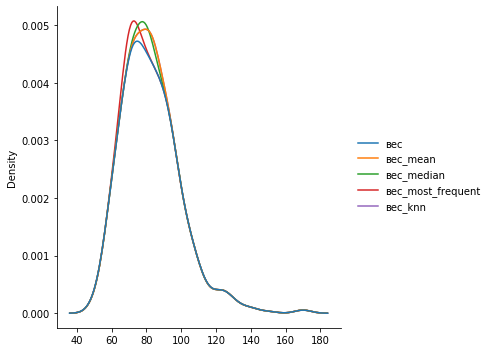

c:\users\софья\appdata\local\programs\python\python37\lib\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
c:\users\софья\appdata\local\programs\python\python37\lib\site-packages\matplotlib\axes\_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
c:\users\софья\appdata\local\programs\python\python37\lib\site-packages\matplotlib\axes\_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


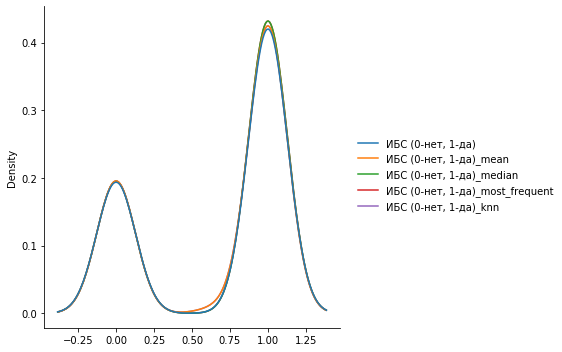

c:\users\софья\appdata\local\programs\python\python37\lib\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
c:\users\софья\appdata\local\programs\python\python37\lib\site-packages\matplotlib\axes\_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
c:\users\софья\appdata\local\programs\python\python37\lib\site-packages\matplotlib\axes\_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


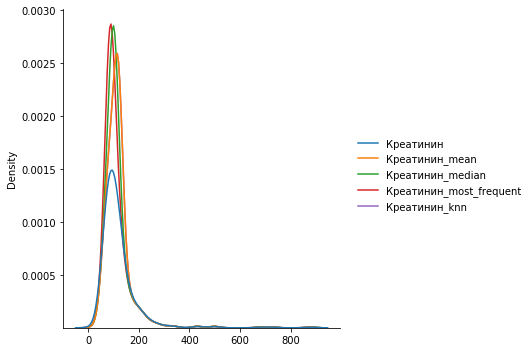

c:\users\софья\appdata\local\programs\python\python37\lib\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
c:\users\софья\appdata\local\programs\python\python37\lib\site-packages\matplotlib\axes\_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
c:\users\софья\appdata\local\programs\python\python37\lib\site-packages\matplotlib\axes\_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


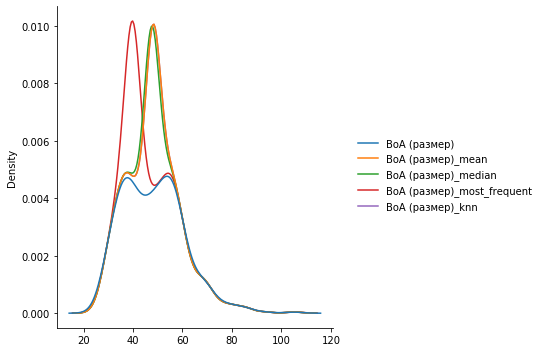

c:\users\софья\appdata\local\programs\python\python37\lib\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
c:\users\софья\appdata\local\programs\python\python37\lib\site-packages\matplotlib\axes\_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
c:\users\софья\appdata\local\programs\python\python37\lib\site-packages\matplotlib\axes\_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


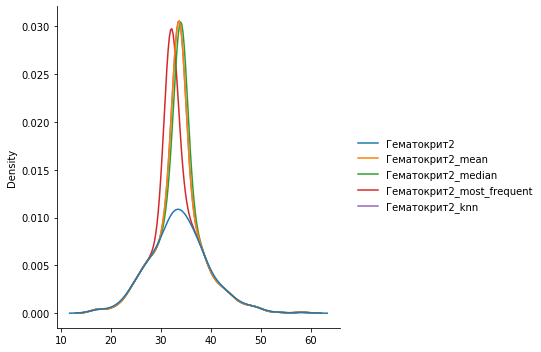

c:\users\софья\appdata\local\programs\python\python37\lib\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
c:\users\софья\appdata\local\programs\python\python37\lib\site-packages\matplotlib\axes\_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
c:\users\софья\appdata\local\programs\python\python37\lib\site-packages\matplotlib\axes\_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


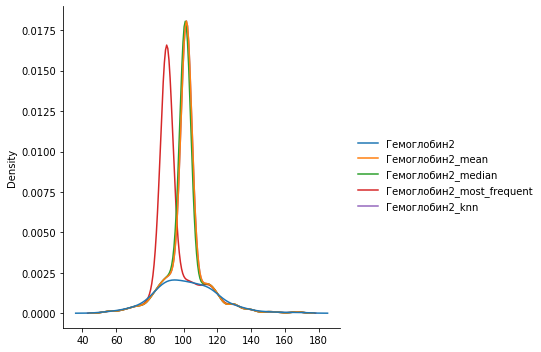

c:\users\софья\appdata\local\programs\python\python37\lib\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
c:\users\софья\appdata\local\programs\python\python37\lib\site-packages\matplotlib\axes\_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
c:\users\софья\appdata\local\programs\python\python37\lib\site-packages\matplotlib\axes\_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


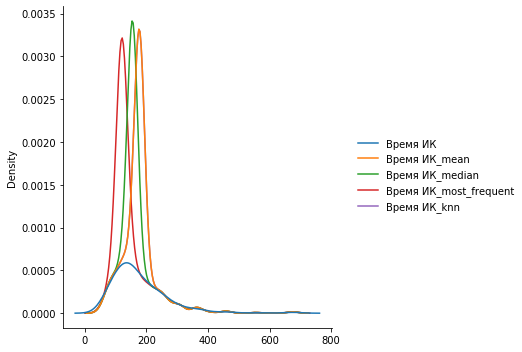

c:\users\софья\appdata\local\programs\python\python37\lib\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
c:\users\софья\appdata\local\programs\python\python37\lib\site-packages\matplotlib\axes\_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
c:\users\софья\appdata\local\programs\python\python37\lib\site-packages\matplotlib\axes\_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


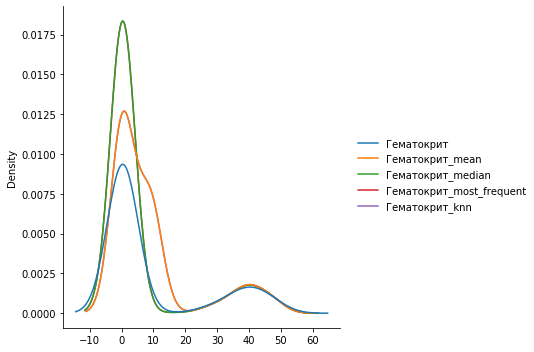

c:\users\софья\appdata\local\programs\python\python37\lib\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
c:\users\софья\appdata\local\programs\python\python37\lib\site-packages\matplotlib\axes\_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
c:\users\софья\appdata\local\programs\python\python37\lib\site-packages\matplotlib\axes\_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


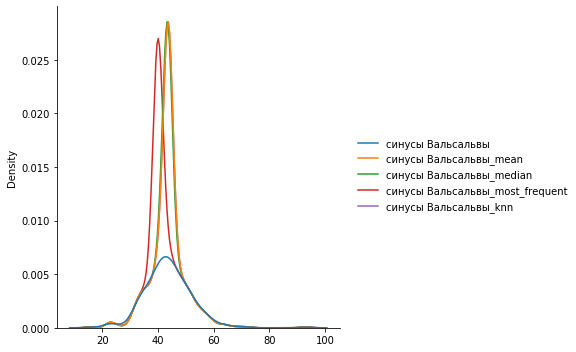

c:\users\софья\appdata\local\programs\python\python37\lib\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
c:\users\софья\appdata\local\programs\python\python37\lib\site-packages\matplotlib\axes\_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
c:\users\софья\appdata\local\programs\python\python37\lib\site-packages\matplotlib\axes\_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


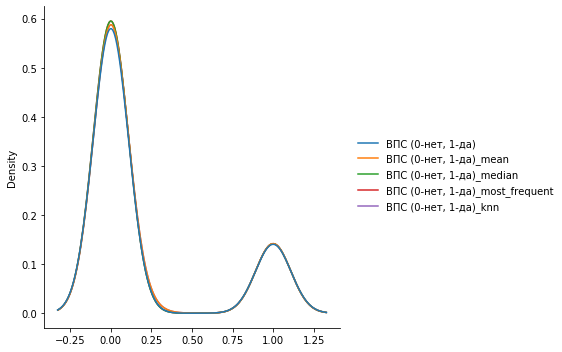

c:\users\софья\appdata\local\programs\python\python37\lib\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
c:\users\софья\appdata\local\programs\python\python37\lib\site-packages\matplotlib\axes\_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
c:\users\софья\appdata\local\programs\python\python37\lib\site-packages\matplotlib\axes\_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


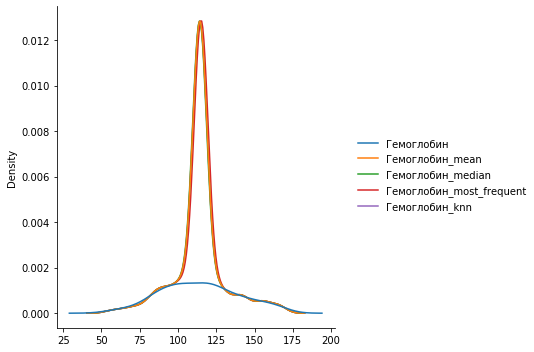

c:\users\софья\appdata\local\programs\python\python37\lib\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
c:\users\софья\appdata\local\programs\python\python37\lib\site-packages\matplotlib\axes\_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
c:\users\софья\appdata\local\programs\python\python37\lib\site-packages\matplotlib\axes\_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


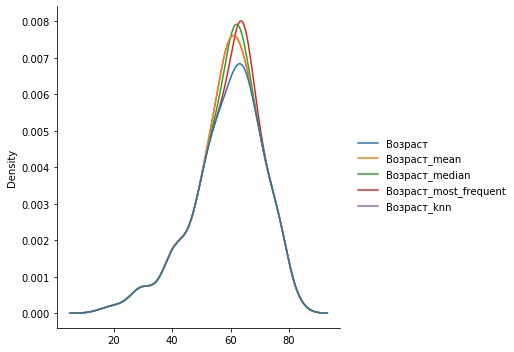

c:\users\софья\appdata\local\programs\python\python37\lib\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
c:\users\софья\appdata\local\programs\python\python37\lib\site-packages\matplotlib\axes\_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
c:\users\софья\appdata\local\programs\python\python37\lib\site-packages\matplotlib\axes\_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


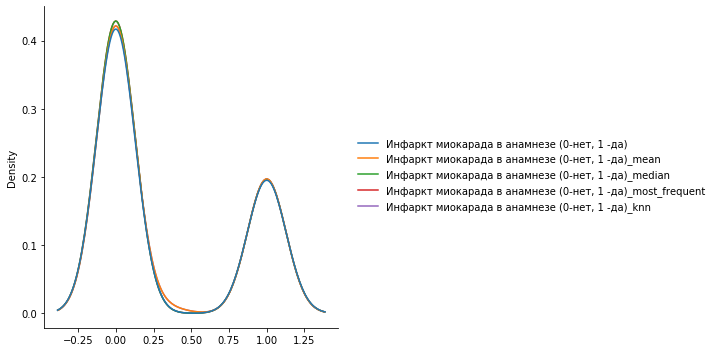

c:\users\софья\appdata\local\programs\python\python37\lib\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
c:\users\софья\appdata\local\programs\python\python37\lib\site-packages\matplotlib\axes\_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
c:\users\софья\appdata\local\programs\python\python37\lib\site-packages\matplotlib\axes\_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


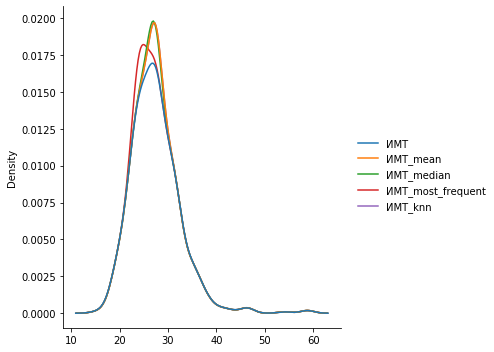

In [5]:
for ind, item in enumerate(nan_cols):
    c=[item, mean_cols[ind],median_cols[ind],freq_cols[ind], knn_cols[ind]]
    sns.displot(df_imp[c], kind='kde')
    plt.show()

In [5]:
def knn_impute(df, col):
    imputer = KNNImputer(n_neighbors=2)
    imp_col = imputer.fit_transform(df[col].to_numpy().reshape(-1, 1))
    imp_col = [item[0] for item in imp_col.tolist()]
    df[col] = imp_col

#Стратегия knn 
for col in nan_cols:
    knn_impute(df, col)

In [16]:
df

,Госпитальная летальность (было/не было),TND+Соматогенный психоз (было/не было),PND Пароксизмальная ночная одышка (было/не было),ЗПТ (Заместительная почечная терапия) (было/не было),Кровотечение (было/не было),Инфаркт миокарда (было/не было),Синдром полиорганной недостаточности (было/не было),Возраст,Пол,рост,...,"Повторный доступ - рестернотомия (0-нет, 1-да)",Продолжительность операции,Эрмасса (дозы),СЗП (дозы),Тромбоциты (дозы),Гемоглобин2,Гематокрит2,Креатинин2,АКШ,ПАК
Пациент,,,,,,,,,,,,,,,,,,,,,
GACACET,0,1,0,0,0,0.0,0,28.0,0.000000,175.0,...,0.0,300.0,0,0,0,102.081053,36.0,70.0,1,0
GACACuN,0,0,0,0,0,0.0,0,83.0,0.755656,161.0,...,0.0,225.0,2,0,0,92.000000,37.0,167.0,0,1
GACADLz,0,0,0,0,0,0.0,0,64.0,1.000000,188.0,...,1.0,265.0,0,0,0,102.081053,32.0,68.0,0,1
GACAGVY,1,1,1,0,1,1.0,0,52.0,0.755656,196.0,...,0.0,240.0,1,4,2,128.000000,29.0,123.0,0,1
GACAHmh,0,0,0,0,0,0.0,1,56.0,1.000000,198.0,...,0.0,310.0,0,0,0,102.081053,36.0,140.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93,0,0,0,0,0,0.0,1,59.0,1.000000,165.0,...,0.0,570.0,4,3,3,113.000000,17.0,124.0,1,0
94,0,0,0,0,0,0.0,0,59.0,0.000000,158.0,...,0.0,440.0,4,2,2,86.000000,24.0,107.0,0,0
95,0,0,0,0,0,0.0,0,55.0,1.000000,173.0,...,0.0,390.0,1,4,2,103.000000,29.0,103.0,0,0


In [6]:
pearson_corr = df.drop(targets, axis=1).corr(method='pearson', min_periods=50)
pos_corr = np.abs(np.nan_to_num(pearson_corr.values, 0.0))
strong_corr_pairs = []
for i in range(1, len(pos_corr)):
    if np.max(pos_corr[i, :i]) >= 0.7:
        j = np.argmax(pos_corr[i, :i])
        strong_corr_pairs.append((i, j, pearson_corr.values[i, j]))

In [7]:
cols = df.drop(targets, axis=1).columns
cols_dict = dict(list(zip(range(len(cols)), cols)))
# сильно коррелирующие между собой фичи
strong_corr_df = pd.DataFrame(strong_corr_pairs).replace(cols_dict).sort_values(2, ascending=False)
strong_corr_df

,0,1,2
4,АПГМ (антеградная перфузия головного мозга),Гематокрит,0.892124
1,BSA,вес,0.860179
7,Креатинин2,Креатинин,0.854822
0,ИМТ,вес,0.851020
2,"Стеноз ВСА справа (0-нет, 1-<50%, 2->50%, 3->75%)",Стеноз ВСА (внутренней сонной артерии) слева (...,0.811749
5,ЦА (циркуляторный арест),АПГМ (антеградная перфузия головного мозга),0.741887
6,СЗП (дозы),Эрмасса (дозы),0.723175
3,"Протяженность расслоения нисхАо (0-нет, 1-да)",Гематокрит,-0.711232


In [8]:
df.drop('СКФ', axis=1, inplace=True)

In [9]:
def safe_division(x, y):
    if (x != x) | (y != y) | (y == 0):
        return 0
    return x / y

from sklearn import linear_model
from sklearn.model_selection import train_test_split

data = df.dropna().astype(float)
data = (data - data.mean()) / (data.std() + 0.0001)

x_train, x_test, y_train, y_test = train_test_split(
    data.drop(columns = targets),
    data[targets],
    test_size=0.3,
    shuffle = True)

clf = linear_model.Lasso(alpha=0.07)
clf.fit(x_train, y_train)

Lasso(alpha=0.07)

In [10]:
names = df.drop(columns = targets).columns
for i,m in enumerate(clf.coef_):
    print('Потенциальные фичи для {}'.format(targets[i]))
    print(names[np.where(m != 0)].values)

Потенциальные фичи для Госпитальная летальность (было/не было)
['Возраст' 'вес' 'АГ (0-нет, 1- да)' 'Синдром Марфана (0-нет, 1-да)'
 'Креатинин'
 'Стеноз ПКА (правой коронарной артерии) (0-нет, 1-<50%, 2->50%, 3->75%, 4-окклюзия)'
 'Стеноз ВТК (ветвь тупого края) (0-нет, 1-<50%, 2->50%, 3->75%, 4-окклюзия)'
 'ВоА (размер)' 'Ретроградная диссекция (0-нет, 1- да)'
 'Протяженность расслоения брюшАо (0-нет, 1-да)' 'Время ИК'
 'Умеренная гипотермия (0-нет, 1-да)'
 'Повторный доступ - рестернотомия (0-нет, 1-да)' 'Гемоглобин2'
 'Креатинин2']
Потенциальные фичи для TND+Соматогенный психоз (было/не было)
['ВПС (0-нет, 1-да)' 'Синдром Марфана (0-нет, 1-да)' 'Креатинин'
 'Стеноз ПКА (правой коронарной артерии) (0-нет, 1-<50%, 2->50%, 3->75%, 4-окклюзия)'
 'Стеноз стЛКА (ствола левой коронарной артерии) (0-нет, 1-<50%, 2->50%, 3->75%, 4- окклюзия)'
 'Стеноз ВТК (ветвь тупого края) (0-нет, 1-<50%, 2->50%, 3->75%, 4-окклюзия)'
 'Стеноз ВСА (внутренней сонной артерии) слева (0-нет, 1-<50%, 2->50%, 3

In [11]:
important_features = dict.fromkeys(targets, {})
for i,m in enumerate(clf.coef_):
    important_features[targets[i]] = list(names[np.where(m != 0)].values)

# Linear Regression

In [23]:
df[targets].count() / df.shape[0]

Госпитальная летальность (было/не было)                 1.0
TND+Соматогенный психоз (было/не было)                  1.0
PND Пароксизмальная ночная одышка (было/не было)        1.0
ЗПТ (Заместительная почечная терапия) (было/не было)    1.0
Кровотечение (было/не было)                             1.0
Инфаркт миокарда (было/не было)                         1.0
Синдром полиорганной недостаточности (было/не было)     1.0
dtype: float64

In [12]:
pred_idx = df[df[targets].isna().any(1)].index
train_test_idx = df[~df[targets].isna().any(1)].index

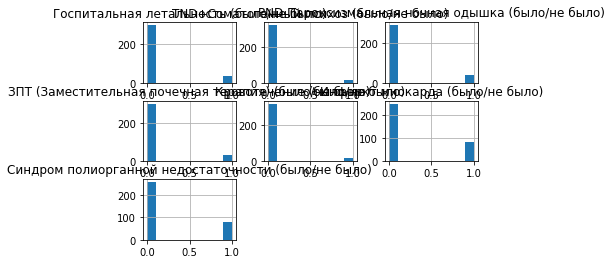

In [26]:
df.loc[train_test_idx, targets].astype(float).hist(); # посмотрим распределения таргетов

In [13]:
#for col in df.columns:
#    if (df[col].nunique() <= 5) & (df[col].dtype != object):
#        df[col] = df[col].astype('category') 
for col in df.columns:
    if (df[col].nunique() <= 5) & (df[col].dtype != object) & (col not in targets):
        df[col] = df[col].astype('category')
        
NUMERICAL = df.select_dtypes(exclude=['category']).columns.tolist()
ORDINAL = df.select_dtypes(include=['category']).columns.tolist()
for tar in targets:
    if tar in NUMERICAL:
        NUMERICAL.remove(tar)
for tar in targets:
    if tar in ORDINAL:
        ORDINAL.remove(tar)        


In [14]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn_pandas import DataFrameMapper, gen_features

def map_features(features=[]):
    numerical_def = gen_features(
        columns=[[c] for c in NUMERICAL if c in features],
        classes=[
            {'class': StandardScaler}
        ]
    )

    ordinal_def = gen_features(
        columns=[[c] for c in ORDINAL if c in features],
        classes=[
            {'class': MinMaxScaler}
        ]
    )
    return numerical_def + ordinal_def

In [15]:
from sklearn.metrics import mean_squared_error, r2_score

def evaluate_model(train, val, tr_y, val_y, features, est):
    mapper = DataFrameMapper(features, df_out=True)
    # трансформим отдельно трейн (фиттим) и тест
    train = mapper.fit_transform(train)
    val = mapper.transform(val)
    
    est.fit(train, tr_y)
    pred_val = est.predict(val)
    pred_train = est.predict(train)

    return pd.DataFrame({
        'train_RMSE': [np.sqrt(mean_squared_error(tr_y, pred_train))], 
        'train_R2': [r2_score(tr_y, pred_train)],
        'val_RMSE': [np.sqrt(mean_squared_error(val_y, pred_val))],
        'val_R2': [r2_score(val_y, pred_val)]
    })

In [18]:
target = 'Госпитальная летальность (было/не было)'
#features = set(df.columns) - set(targets)
features = important_features[target]
X, y = df.loc[train_test_idx, features], df.loc[train_test_idx, target]
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state=0, test_size=.2, shuffle=True)

from sklearn.linear_model import LinearRegression, ElasticNet, Ridge, Lasso

reg_gospital_lethalty = LinearRegression()
scores = evaluate_model(train_X, val_X, np.log(train_y+0.001), np.log(val_y+0.001), map_features(features), reg_gospital_lethalty)
scores

,train_RMSE,train_R2,val_RMSE,val_R2
0,1.813357,0.242095,2.150499,0.166783


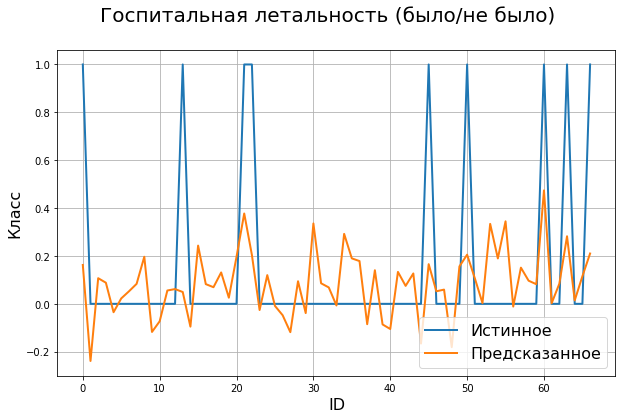

In [19]:
reg_gospital_lethalty.fit(train_X, train_y)
pred_val = reg_gospital_lethalty.predict(val_X)
pred_train = reg_gospital_lethalty.predict(train_X)
valy=[]
for k in val_y:
    valy.append(k)
n=len(pred_val)
fig = plt.figure(facecolor='white',figsize=(10,6))
fig.suptitle(target, fontsize=20)
plt.plot(np.linspace(0,n-1, num = n), valy, np.linspace(0,n-1, num = n), pred_val, linewidth=2)
plt.ylabel('Класс',fontsize=16)
plt.xlabel('ID', fontsize=16)
plt.legend(['Истинное', 'Предсказанное'], fontsize=16)
plt.grid(True)
plt.show()


In [20]:
target = 'TND+Соматогенный психоз (было/не было)'
#features = set(df.columns) - set(targets)
features = important_features[target]
#from imblearn.over_sampling import SMOTE

#smote = SMOTE(k_neighbors=5)
#X_sm, y_sm = smote.fit_sample(df.loc[train_test_idx, features], df.loc[train_test_idx, target],)

X, y = df.loc[train_test_idx, features], df.loc[train_test_idx, target]

#X, y = X_sm, y_sm
#X = X.fillna(0)
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state=0, test_size=.2, shuffle=True)

from sklearn.linear_model import LinearRegression, ElasticNet, Ridge, Lasso

som_psyhoz = LinearRegression()
scores = evaluate_model(train_X, val_X, np.log(train_y+0.001), np.log(val_y+0.001), map_features(features), som_psyhoz)
scores

,train_RMSE,train_R2,val_RMSE,val_R2
0,1.38861,0.127819,1.396164,0.04518


c:\users\софья\appdata\local\programs\python\python37\lib\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
c:\users\софья\appdata\local\programs\python\python37\lib\site-packages\matplotlib\axes\_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


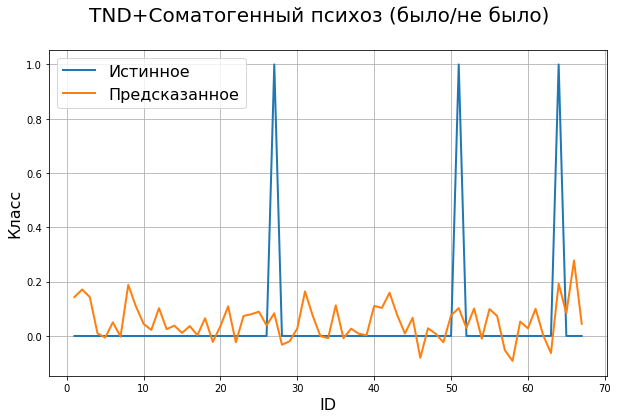

In [21]:
som_psyhoz.fit(train_X, train_y)
pred_val = som_psyhoz.predict(val_X)
pred_train = som_psyhoz.predict(train_X)
n=len(pred_val)
fig = plt.figure(facecolor='white',figsize=(10,6))
fig.suptitle(target, fontsize=20)
plt.plot(np.linspace(1,n, num = n), val_y, np.linspace(1,n, num = n), pred_val, linewidth=2)
plt.ylabel('Класс',fontsize=16)
plt.xlabel('ID', fontsize=16)
plt.legend(['Истинное', 'Предсказанное'], fontsize=16)
plt.grid(True)
plt.show()

In [22]:
target = 'PND Пароксизмальная ночная одышка (было/не было)'
#features = set(df.columns) - set(targets)
features = important_features[target]

from imblearn.over_sampling import SMOTE

#smote = SMOTE(k_neighbors=3)
#X_sm, y_sm = smote.fit_sample(df.loc[train_test_idx, features], df.loc[train_test_idx, target])
X, y = df.loc[train_test_idx, features], df.loc[train_test_idx, target]

#X, y = X_sm, y_sm
#X = X.fillna(0)
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state=0, test_size=.2, shuffle=True)

from sklearn.linear_model import LinearRegression, ElasticNet, Ridge, Lasso

paroks_odyshka = LinearRegression()
scores = evaluate_model(train_X, val_X, np.log(train_y+0.001), np.log(val_y+0.001), map_features(features), paroks_odyshka)
scores

,train_RMSE,train_R2,val_RMSE,val_R2
0,2.276374,0.110612,1.80088,-0.588613


c:\users\софья\appdata\local\programs\python\python37\lib\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
c:\users\софья\appdata\local\programs\python\python37\lib\site-packages\matplotlib\axes\_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


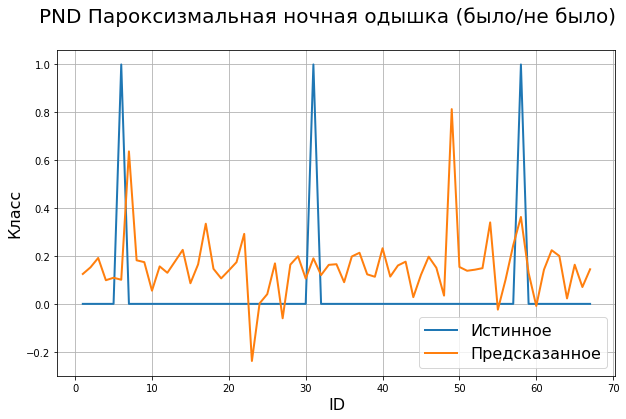

In [23]:
paroks_odyshka.fit(train_X, train_y)
pred_val = paroks_odyshka.predict(val_X)
pred_train = paroks_odyshka.predict(train_X)
n=len(pred_val)
fig = plt.figure(facecolor='white',figsize=(10,6))
fig.suptitle(target, fontsize=20)
plt.plot(np.linspace(1,n, num = n), val_y, np.linspace(1,n, num = n), pred_val, linewidth=2)
plt.ylabel('Класс',fontsize=16)
plt.xlabel('ID', fontsize=16)
plt.title=target
plt.legend(['Истинное', 'Предсказанное'], fontsize=16)
plt.grid(True)
plt.show()

In [27]:
target = 'ЗПТ (Заместительная почечная терапия) (было/не было)'
#features = set(df.columns) - set(targets)
features = important_features[target]

from imblearn.over_sampling import SMOTE

#smote = SMOTE()
#X_sm, y_sm = smote.fit_sample(df.loc[train_test_idx, features], df.loc[train_test_idx, target])
X, y = df.loc[train_test_idx, features], df.loc[train_test_idx, target]

#X, y = X_sm, y_sm
#X = X.fillna(1)
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state=0, test_size=.2, shuffle=True)

from sklearn.linear_model import LinearRegression, ElasticNet, Ridge, Lasso

zames_poch_ter = LinearRegression()
scores = evaluate_model(train_X, val_X, np.log(train_y+0.001), np.log(val_y+0.001), map_features(features), zames_poch_ter)
scores

,train_RMSE,train_R2,val_RMSE,val_R2
0,1.766131,0.256504,1.754266,0.209212


c:\users\софья\appdata\local\programs\python\python37\lib\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
c:\users\софья\appdata\local\programs\python\python37\lib\site-packages\matplotlib\axes\_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


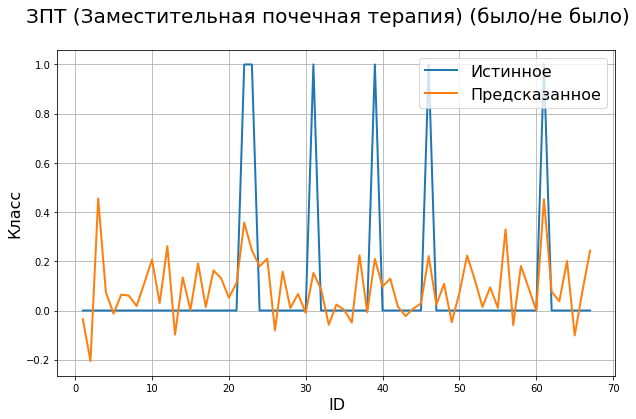

In [28]:
zames_poch_ter.fit(train_X, train_y)
pred_val = zames_poch_ter.predict(val_X)
pred_train = zames_poch_ter.predict(train_X)
n=len(pred_val)
fig = plt.figure(facecolor='white',figsize=(10,6))
fig.suptitle(target, fontsize=20)
plt.plot(np.linspace(1,n, num = n), val_y, np.linspace(1,n, num = n), pred_val, linewidth=2)
plt.ylabel('Класс',fontsize=16)
plt.xlabel('ID', fontsize=16)
plt.title=target
plt.legend(['Истинное', 'Предсказанное'], fontsize=16)
plt.grid(True)
plt.show()

In [29]:
target = 'Кровотечение (было/не было)'
#features = set(df.columns) - set(targets)
features = important_features[target]

from imblearn.over_sampling import SMOTE

#smote = SMOTE()
#X_sm, y_sm = smote.fit_sample(df.loc[train_test_idx, features], df.loc[train_test_idx, target])
X, y = df.loc[train_test_idx, features], df.loc[train_test_idx, target]

#X, y = X_sm, y_sm
#X = X.fillna(1)
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state=0, test_size=.15, shuffle=True)

from sklearn.linear_model import LinearRegression, ElasticNet, Ridge, Lasso

krovotech = LinearRegression()
scores = evaluate_model(train_X, val_X, np.log(train_y+0.001), np.log(val_y+0.001), map_features(features), krovotech)
scores

,train_RMSE,train_R2,val_RMSE,val_R2
0,1.363853,0.110796,1.744979,0.117401


c:\users\софья\appdata\local\programs\python\python37\lib\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
c:\users\софья\appdata\local\programs\python\python37\lib\site-packages\matplotlib\axes\_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


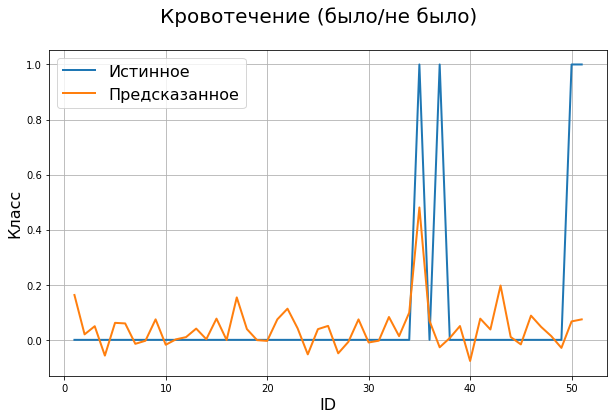

In [30]:
krovotech.fit(train_X, train_y)
pred_val = krovotech.predict(val_X)
pred_train = krovotech.predict(train_X)
n=len(pred_val)
fig = plt.figure(facecolor='white',figsize=(10,6))
fig.suptitle(target, fontsize=20)
plt.plot(np.linspace(1,n, num = n), val_y, np.linspace(1,n, num = n), pred_val, linewidth=2)
plt.ylabel('Класс',fontsize=16)
plt.xlabel('ID', fontsize=16)
plt.title=target
plt.legend(['Истинное', 'Предсказанное'], fontsize=16)
plt.grid(True)
plt.show()

In [31]:
target = 'Инфаркт миокарда (было/не было)'
eatures = set(df.columns) - set(targets)
#features = important_features[target]

from imblearn.over_sampling import SMOTE

#smote = SMOTE(k_neighbors=2)
#X_sm, y_sm = smote.fit_sample(df.loc[train_test_idx, features], df.loc[train_test_idx, target])
X, y = df.loc[train_test_idx, features], df.loc[train_test_idx, target]

#X, y = X_sm, y_sm
#X = X.fillna(1)
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state=0, test_size=.20, shuffle=True)

from sklearn.linear_model import LinearRegression, ElasticNet, Ridge, Lasso

infarkt = LinearRegression()
scores = evaluate_model(train_X, val_X, np.log(train_y+0.001), np.log(val_y+0.001), map_features(features), infarkt)
scores

,train_RMSE,train_R2,val_RMSE,val_R2
0,2.708452,0.198043,2.890252,-0.007226


c:\users\софья\appdata\local\programs\python\python37\lib\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
c:\users\софья\appdata\local\programs\python\python37\lib\site-packages\matplotlib\axes\_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


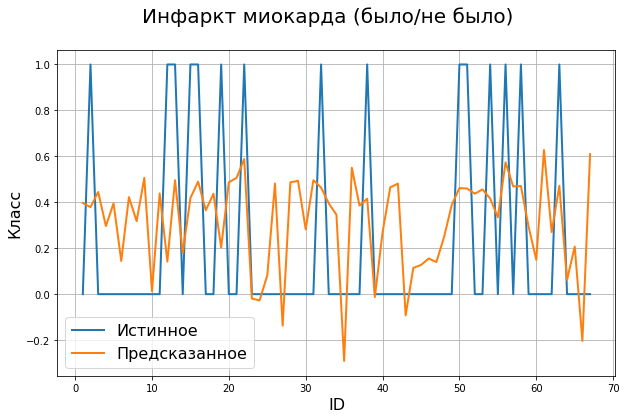

In [32]:
infarkt.fit(train_X, train_y)
pred_val = infarkt.predict(val_X)
pred_train = infarkt.predict(train_X)
n=len(pred_val)
fig = plt.figure(facecolor='white',figsize=(10,6))
fig.suptitle(target, fontsize=20)
plt.plot(np.linspace(1,n, num = n), val_y, np.linspace(1,n, num = n), pred_val, linewidth=2)
plt.ylabel('Класс',fontsize=16)
plt.xlabel('ID', fontsize=16)
plt.title=target
plt.legend(['Истинное', 'Предсказанное'], fontsize=16)
plt.grid(True)
plt.show()

In [33]:
target = 'Синдром полиорганной недостаточности (было/не было)'
#features = set(df.columns) - set(targets)
features = important_features[target]

from imblearn.over_sampling import SMOTE

#smote = SMOTE()
#X_sm, y_sm = smote.fit_sample(df.loc[train_test_idx, features], df.loc[train_test_idx, target])
X, y = df.loc[train_test_idx, features], df.loc[train_test_idx, target]

#X, y = X_sm, y_sm
#X = X.fillna(1)
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state=0, test_size=.2, shuffle=True)

from sklearn.linear_model import LinearRegression, ElasticNet, Ridge, Lasso

syndrom_poly_nedost = LinearRegression()
scores = evaluate_model(train_X, val_X, np.log(train_y+0.001), np.log(val_y+0.001), map_features(features), syndrom_poly_nedost)
scores

,train_RMSE,train_R2,val_RMSE,val_R2
0,2.457566,0.273707,2.72916,0.205783


c:\users\софья\appdata\local\programs\python\python37\lib\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
c:\users\софья\appdata\local\programs\python\python37\lib\site-packages\matplotlib\axes\_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


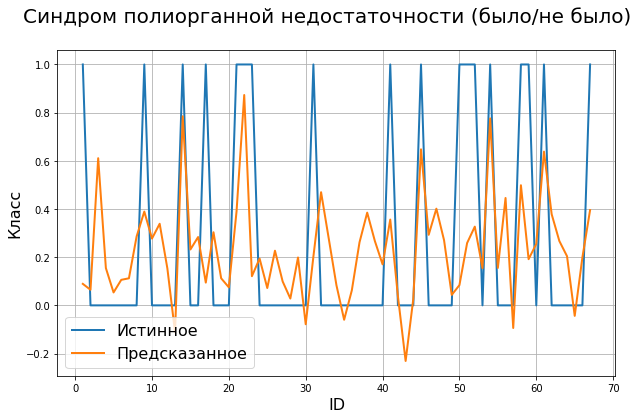

In [34]:
syndrom_poly_nedost.fit(train_X, train_y)
pred_val = syndrom_poly_nedost.predict(val_X)
pred_train = syndrom_poly_nedost.predict(train_X)
n=len(pred_val)
fig = plt.figure(facecolor='white',figsize=(10,6))
fig.suptitle(target, fontsize=20)
plt.plot(np.linspace(1,n, num = n), val_y, np.linspace(1,n, num = n), pred_val, linewidth=2)
plt.ylabel('Класс',fontsize=16)
plt.xlabel('ID', fontsize=16)
plt.title=target
plt.legend(['Истинное', 'Предсказанное'], fontsize=16)
plt.grid(True)
plt.show()

In [ ]:
"""
reg_gospital_lethalty
som_psyhoz
paroks_odyshka
prod_ivl
zames_poch_ter
krovotech
infarkt
syndrom_poly_nedost
"""